In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\Manav Doshi\Documents\LS 2021 Assignments\Fundamentals of MLOps\mlops_assignment\data\creditcard.csv', nrows = 28000)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,34804,0.905340,-0.444087,-0.335214,1.097341,0.347810,0.956708,0.104177,0.214844,0.210624,...,-0.049647,-0.335160,-0.376953,-1.344595,0.731523,-0.260203,-0.000636,0.018537,169.67,0
27996,34804,-0.272894,1.182035,-0.378801,0.949242,-0.020458,-0.845142,0.955518,0.148454,-0.719269,...,0.204533,0.534778,0.226534,0.032599,-0.600684,-0.393867,0.284535,0.171296,89.99,0
27997,34804,1.204991,0.253059,0.251176,1.076599,-0.170065,-0.522115,0.070319,-0.037871,0.129104,...,0.042323,0.161314,-0.055432,0.059273,0.582111,-0.295154,0.024198,0.014418,2.00,0
27998,34805,-0.667309,0.521356,0.965784,-0.714486,0.967801,-0.779216,0.869049,-0.166149,-0.725733,...,-0.378990,-1.322014,-0.001380,-0.598644,-0.114377,0.660993,-0.043222,0.086252,30.99,0


In [4]:
test_dataset = df.sample(frac = 0.1, random_state = 42)
df = df.drop(test_dataset.index)

df.reset_index(drop = True, inplace = True)
test_dataset.reset_index(drop = True, inplace = True)

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(test_dataset.shape))

Data for Model Training & Validation: (25200, 31)
Unseen Data For Predictions: (2800, 31)


In [5]:
test_dataset.to_csv(r'C:\Users\Manav Doshi\Documents\LS 2021 Assignments\Fundamentals of MLOps\mlops_assignment\data\test.csv', index = False)

In [13]:
from pycaret.classification import *
import mlflow
mlflow.set_tracking_uri('')

In [14]:
expt_basic = setup(
    data = df, 
    target = 'Class', 
    session_id=30,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    numeric_imputation="median",        # "mean" by default
    categorical_imputation="mode",      # "constant" (not_available) by default
    log_experiment = True,
    experiment_name = 'Credit Card Fraud - Expt 2',
    log_plots = True,
)


,Description,Value
0,session_id,30
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(25200, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best_models = compare_models(sort = "F1", n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9927,0.9095,0.9690,0.9345,0.9343,0.9367,0.3430
ada,Ada Boost Classifier,0.9995,0.9972,0.8952,0.9548,0.9161,0.9158,0.9203,0.3890
et,Extra Trees Classifier,0.9995,0.9927,0.8810,0.9548,0.9084,0.9081,0.9128,0.1200
dt,Decision Tree Classifier,0.9993,0.9463,0.8929,0.9071,0.8941,0.8938,0.8967,0.0560
gbc,Gradient Boosting Classifier,0.9993,0.9699,0.8762,0.9012,0.8823,0.8820,0.8851,1.8360
lightgbm,Light Gradient Boosting Machine,0.9982,0.9256,0.7857,0.7948,0.7767,0.7759,0.7825,0.2050
lda,Linear Discriminant Analysis,0.9981,0.9766,0.7738,0.6762,0.7088,0.7079,0.7159,0.0390
lr,Logistic Regression,0.9980,0.9494,0.6595,0.7308,0.6691,0.6682,0.6810,1.1820
qda,Quadratic Discriminant Analysis,0.9975,0.8804,0.7714,0.6110,0.6587,0.6576,0.6735,0.0340
ridge,Ridge Classifier,0.9976,0.0000,0.5143,0.6500,0.5703,0.5691,0.5750,0.0200


In [16]:
for model in best_models:
    print(model)
    print()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=30)



In [17]:
rf = create_model('rf', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9995,0.9999,1.0000,0.8571,0.9231,0.9228,0.9256
5,0.9990,0.9997,0.8333,0.8333,0.8333,0.8328,0.8328
6,0.9995,0.9998,0.8333,1.0000,0.9091,0.9088,0.9126
7,0.9995,0.9999,0.8571,1.0000,0.9231,0.9228,0.9256
8,0.9990,0.9278,0.7143,1.0000,0.8333,0.8328,0.8447
9,0.9995,0.9999,0.8571,1.0000,0.9231,0.9228,0.9256


In [18]:
ada = create_model('ada', fold = 10)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9995,1.0000,0.8333,1.0000,0.9091,0.9088,0.9126
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9995,0.9998,1.0000,0.8571,0.9231,0.9228,0.9256
5,0.9995,0.9998,1.0000,0.8571,0.9231,0.9228,0.9256
6,0.9995,0.9998,0.8333,1.0000,0.9091,0.9088,0.9126
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9985,0.9751,0.5714,1.0000,0.7273,0.7266,0.7554
9,0.9985,0.9974,0.7143,0.8333,0.7692,0.7685,0.7708


In [19]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9995,0.9997,1.0000,0.8571,0.9231,0.9228,0.9256
5,0.9985,0.9996,0.6667,0.8000,0.7273,0.7265,0.7296
6,0.9995,0.9993,0.8333,1.0000,0.9091,0.9088,0.9126
7,0.9985,0.9999,0.5714,1.0000,0.7273,0.7266,0.7554
8,0.9985,0.9286,0.5714,1.0000,0.7273,0.7266,0.7554
9,0.9980,0.9998,0.4286,1.0000,0.6000,0.5992,0.6540


In [20]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9995,0.9999,1.0000,0.8571,0.9231,0.9228,0.9256
2,0.9995,1.0000,0.8333,1.0000,0.9091,0.9088,0.9126
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9995,1.0000,1.0000,0.8571,0.9231,0.9228,0.9256
5,0.9995,0.9998,1.0000,0.8571,0.9231,0.9228,0.9256
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
8,0.9985,0.9838,0.5714,1.0000,0.7273,0.7266,0.7554
9,0.9985,0.9975,0.7143,0.8333,0.7692,0.7685,0.7708


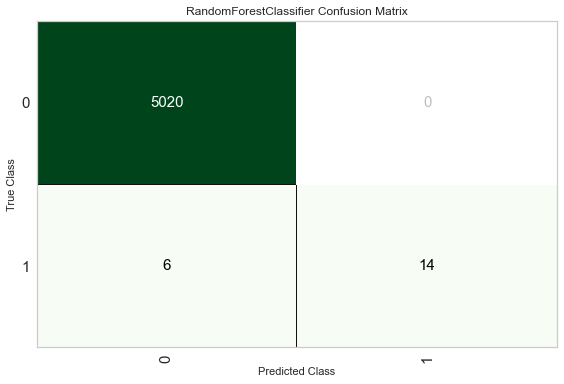

In [21]:
plot_model(tuned_rf, plot = 'confusion_matrix')


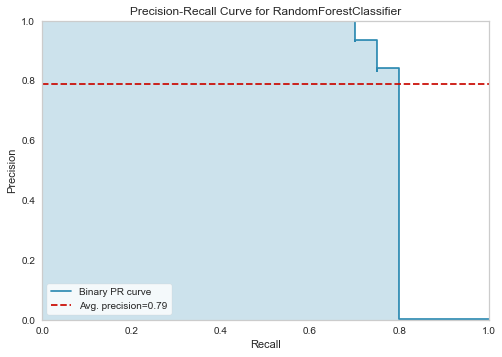

In [22]:
plot_model(tuned_rf, plot = 'pr')

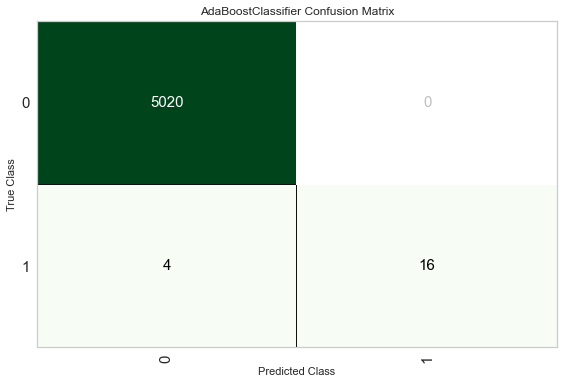

In [23]:
plot_model(tuned_ada, plot = 'confusion_matrix')

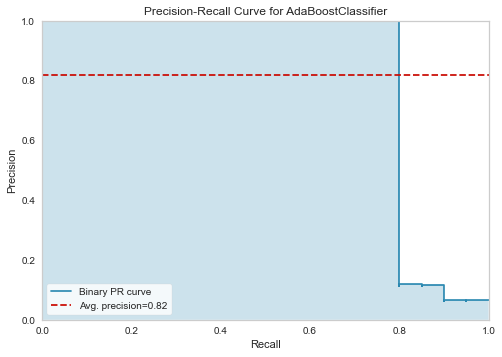

In [24]:
plot_model(tuned_ada, plot = 'pr')

In [25]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9988,0.9003,0.7000,1.0000,0.8235,0.8230,0.8362


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,4830.0,1.318624,0.495558,0.111169,0.693076,0.175300,-0.528681,0.024650,-0.271112,1.267152,...,0.028618,-0.537210,0.329047,0.105473,-0.046288,0.017458,1.980000,0,0,0.9995
1,33489.0,1.224097,-0.023473,0.452079,0.738764,-0.432973,-0.366383,-0.108838,-0.063224,0.582372,...,0.001392,-0.100647,0.392677,0.210433,-0.019973,0.014750,23.950001,0,0,0.9995
2,5214.0,-0.211853,-2.171352,-0.672998,1.772242,-1.010618,-0.089961,0.596430,-0.249935,2.141497,...,-0.853614,-0.197101,0.339064,0.545179,-0.166514,0.160899,757.549988,0,0,0.9995
3,27681.0,-1.923074,2.151937,-1.783478,-0.179766,1.483566,3.846566,-2.014901,-0.550958,-1.413838,...,0.193944,0.984813,-0.119949,-0.353922,-0.494668,-0.016742,6.700000,0,0,0.9995
4,15160.0,-1.330549,0.245955,0.700337,-2.558681,1.103394,4.562194,-1.817631,-1.664204,0.175746,...,-0.086147,0.965919,0.559777,-0.176092,-0.073279,0.071905,79.000000,0,0,0.9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,4132.0,-0.808892,0.271527,2.391952,0.218542,-0.353846,0.752260,-0.240171,0.222366,1.819160,...,-0.142830,-0.442965,-0.113789,1.137075,-0.120120,0.089342,48.950001,0,0,0.9995
5036,1166.0,-1.362667,1.034377,0.962541,-1.687791,0.305254,-0.452495,0.840300,-0.299621,0.447843,...,-0.181619,-0.325055,-0.271906,0.704353,-0.493990,0.041702,19.219999,0,0,0.9995
5037,32440.0,-0.800140,1.271082,0.980734,1.138538,-0.143432,-0.145684,0.635390,0.113176,0.425528,...,-0.185861,-0.163673,0.088530,-0.203586,0.634599,0.310449,30.990000,0,0,0.9995
5038,26966.0,1.214522,0.007067,-0.330466,0.890385,0.669037,1.120938,-0.105341,0.283448,0.266645,...,-0.291694,-1.710519,0.831878,-0.222015,0.025880,-0.010782,23.150000,0,0,0.9995


In [29]:
predict_model(tuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9992,0.9919,0.8000,1.0000,0.8889,0.8885,0.8941


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,4830.0,1.318624,0.495558,0.111169,0.693076,0.175300,-0.528681,0.024650,-0.271112,1.267152,...,0.028618,-0.537210,0.329047,0.105473,-0.046288,0.017458,1.980000,0,0,0.6703
1,33489.0,1.224097,-0.023473,0.452079,0.738764,-0.432973,-0.366383,-0.108838,-0.063224,0.582372,...,0.001392,-0.100647,0.392677,0.210433,-0.019973,0.014750,23.950001,0,0,0.7117
2,5214.0,-0.211853,-2.171352,-0.672998,1.772242,-1.010618,-0.089961,0.596430,-0.249935,2.141497,...,-0.853614,-0.197101,0.339064,0.545179,-0.166514,0.160899,757.549988,0,0,0.5960
3,27681.0,-1.923074,2.151937,-1.783478,-0.179766,1.483566,3.846566,-2.014901,-0.550958,-1.413838,...,0.193944,0.984813,-0.119949,-0.353922,-0.494668,-0.016742,6.700000,0,0,0.7442
4,15160.0,-1.330549,0.245955,0.700337,-2.558681,1.103394,4.562194,-1.817631,-1.664204,0.175746,...,-0.086147,0.965919,0.559777,-0.176092,-0.073279,0.071905,79.000000,0,0,0.6927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,4132.0,-0.808892,0.271527,2.391952,0.218542,-0.353846,0.752260,-0.240171,0.222366,1.819160,...,-0.142830,-0.442965,-0.113789,1.137075,-0.120120,0.089342,48.950001,0,0,0.6713
5036,1166.0,-1.362667,1.034377,0.962541,-1.687791,0.305254,-0.452495,0.840300,-0.299621,0.447843,...,-0.181619,-0.325055,-0.271906,0.704353,-0.493990,0.041702,19.219999,0,0,0.6929
5037,32440.0,-0.800140,1.271082,0.980734,1.138538,-0.143432,-0.145684,0.635390,0.113176,0.425528,...,-0.185861,-0.163673,0.088530,-0.203586,0.634599,0.310449,30.990000,0,0,0.6874
5038,26966.0,1.214522,0.007067,-0.330466,0.890385,0.669037,1.120938,-0.105341,0.283448,0.266645,...,-0.291694,-1.710519,0.831878,-0.222015,0.025880,-0.010782,23.150000,0,0,0.7265


In [30]:
final_rf = finalize_model(tuned_rf)

In [31]:
final_ada = finalize_model(tuned_ada)

In [32]:
deploy_model(model = final_rf, model_name = 'rf_deployed', platform = 'aws', authentication = {'bucket' : 'mlops200100094'})

Model Successfully Deployed on AWS S3


In [33]:
deploy_model(model = final_ada, model_name = 'ada_deployed', platform = 'aws', authentication = {'bucket' : 'mlops200100094'})

Model Successfully Deployed on AWS S3
